In [1]:
# загружаем пакеты, которые нам потребуются

import requests #пакет для парсинга, т.е. для извлечения информации с сайта. мы будем парсить сайт, имеющий api
import json #пакет для работы с данными в формате json
import re #пакет для работы с регулярными выражениями
import pandas as pd #пакет для очистки и первичного анализа данных
import math #пакет для выполнения математических операций
import numpy as np #продвинутый пакет для выполнения математических операций и операций с массивами
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загружаем метаданные о статьях, опубликованных в этом журнале, о которых имеются сведения в OpenAlex

'''
OpenAlex имеет открытый API. API = Application Programming Interface (программный интерфейс приложения).
API определяет, как разные приложения взаимодействуют друг с другом, используя запросы и ответы. 
В документации каждого API есть информация о том, как формировать запросы. Документацию к API OpenAlex 
для самых любопытных см. https://docs.openalex.org/quickstart-tutorial 
'''

# Данные загружаются в формате json
# Подставить вместо S2764780593 Вашего журнала:

url = 'https://api.openalex.org/works?filter=host_venue.id:S4210214681' 
rj = requests.get(url).json()
rj

{'meta': {'count': 716, 'db_response_time_ms': 212, 'page': 1, 'per_page': 25},
 'results': [{'id': 'https://openalex.org/W2409327391',
   'doi': 'https://doi.org/10.17323/1995-459x.2016.1.31.42',
   'title': 'Quadruple Innovation Helix and Smart Specialization: Knowledge Production and National Competitiveness',
   'display_name': 'Quadruple Innovation Helix and Smart Specialization: Knowledge Production and National Competitiveness',
   'publication_year': 2016,
   'publication_date': '2016-01-01',
   'ids': {'openalex': 'https://openalex.org/W2409327391',
    'doi': 'https://doi.org/10.17323/1995-459x.2016.1.31.42',
    'mag': '2409327391'},
   'primary_location': {'is_oa': True,
    'landing_page_url': 'https://doi.org/10.17323/1995-459x.2016.1.31.42',
    'pdf_url': None,
    'source': {'id': 'https://openalex.org/S4210214681',
     'display_name': 'Форсайт',
     'issn_l': '1995-459X',
     'issn': ['2500-2597', '1995-459X', '2312-9972'],
     'host_organization': 'https://openal

In [3]:
# К сожалению, в переменную rj сохранились не все результаты, а только первая страница с 25 результатами. 
# Большинство api работают именно так:-((, т.е. имеют многостраничные выводы и каждую страницу нужно 
# загружать отдельно, но можно задать цикл, для автоматической загрузки страниц (хотя некоторые API имеют 
# ограничения на число загруженных страниц, но OpenAlex таких ограничений не имеет)

print('Number of results in current rj variable:', len(rj['results']))

print('Total number of results:', rj['meta']['count'])
n_pages = math.ceil(rj['meta']['count']/rj['meta']['per_page'])
print ('Total number of pages:', n_pages)

Number of results in current rj variable: 25
Total number of results: 716
Total number of pages: 29


In [4]:
data = rj["results"] # сохраняем поле results c уже имеющейся первой страницы в переменную data

# Начиная со второй страницы и далее до последней страницы, проходим по всем страницам 
# и добавляем содержимое поля results с каждой страницы в переменную data

for page in range(2, n_pages+1):
    print(page, end = " ")
    rj_new = requests.get(url + f'&page={page}').json()
    data.extend(rj_new['results'])

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [5]:
# Из переменной data сделаем короткую таблицу, отобрав только нужные поля в колонки таблицы

df = pd.DataFrame(columns = ['doi', 'title', 'year', 'cited_by', 'N_authors']) 

for index, item in enumerate(data): #перебираем результаты и берем нужные поля
    df.at[index,'doi'] = item['doi'] #вносим результат в нужную колонку
    df.at[index,'title'] = item['title']
    df.at[index,'year'] = item['publication_year']
    df.at[index,'source'] = item['host_venue']['display_name']
    df.at[index,'cited_by'] = item['cited_by_count']
    df.at[index,'N_authors'] = len(item['authorships'])
    # дополнительно создаем отдельные колонки id_№ и name_№ для каждого автора
    for tag in range(len(item['authorships'])):
        num = str(tag + 1)
        df.at[index,'id_'+num] = item['authorships'][tag]['author']['id']
        df.at[index,'name_'+num] = item['authorships'][tag]['author']['display_name']  
        
df.info() #просмотр описания сохраненной таблицы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 715
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   doi        388 non-null    object
 1   title      659 non-null    object
 2   year       716 non-null    object
 3   cited_by   716 non-null    object
 4   N_authors  716 non-null    object
 5   source     716 non-null    object
 6   id_1       641 non-null    object
 7   name_1     641 non-null    object
 8   id_2       389 non-null    object
 9   name_2     383 non-null    object
 10  id_3       210 non-null    object
 11  name_3     210 non-null    object
 12  id_4       93 non-null     object
 13  name_4     93 non-null     object
 14  id_5       38 non-null     object
 15  name_5     34 non-null     object
 16  id_6       25 non-null     object
 17  name_6     21 non-null     object
 18  id_7       15 non-null     object
 19  name_7     14 non-null     object
 20  id_8       7 non-null      objec

In [6]:
df.head() #просмотр данных - верхних строк таблицы 

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_5,name_5,id_6,name_6,id_7,name_7,id_8,name_8,id_9,name_9
0,https://doi.org/10.17323/1995-459x.2016.1.31.42,Quadruple Innovation Helix and Smart Specializ...,2016,97,2,Форсайт,https://openalex.org/A4339445160,Elias G. Carayannis,https://openalex.org/A4342657467,Evangelos Grigoroudis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://doi.org/10.17323/2500-2597.2017.4.6.8,Industry 4.0: New Challenges and Opportunities...,2017,75,1,Форсайт,https://openalex.org/A2885210810,Sandrine Kergroach,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://doi.org/10.17323/2500-2597.2017.2.10.26,"The Knowledge Triangle between Research, Educa...",2017,47,2,Форсайт,https://openalex.org/A2408584087,Maximilian Unger,https://openalex.org/A627483062,Wolfgang Polt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://doi.org/10.17323/1995-459x.2014.3.70.81,Commercialising Public Research under the Open...,2014,37,2,Форсайт,https://openalex.org/A4331229280,Mario Cervantes,https://openalex.org/A2132044947,Dirk Meissner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://doi.org/10.17323/2500-2597.2019.2.19.41,Generic and Specific Skills as Components of H...,2019,37,3,Форсайт,https://openalex.org/A2259413666,Yaroslav Kuzminov,https://openalex.org/A4357915678,Pavel Sorokin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail() #просмотр данных - нижних строк таблицы

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_5,name_5,id_6,name_6,id_7,name_7,id_8,name_8,id_9,name_9
711,None,Помогут ли фундаментальные исследования предот...,2014,0,2,Форсайт,https://openalex.org/A2631403326,Андреас Шибани,https://openalex.org/A4332038083,Кристиан Райнер,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,None,Размывание или развитие: исследования в погран...,2007,0,2,Форсайт,https://openalex.org/A4357178441,Армен Глебович Сергеев,https://openalex.org/A4356267295,А Н Соколов,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
713,None,Инновации в российском теплоснабжении: возможн...,2014,0,2,Форсайт,https://openalex.org/A4344639209,Александр Александрович Ковалев,https://openalex.org/A4348313452,Лариса Юрьевна Проскурякова,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,None,Амбициозная цель: оценка стратегии Европейског...,2008,0,2,Форсайт,https://openalex.org/A2631403326,Андреас Шибани,https://openalex.org/A622482278,Герхард Штрейхер,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,None,Современные нотации бизнес-моделей: визуальный...,2014,0,3,Форсайт,https://openalex.org/A4359752196,Тетяна Василівна Гаврилова,https://openalex.org/A4337665749,Артем Иванович Алсуфьев,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df['year'].value_counts(dropna = False, sort = False)) #за какие годы и сколько наблюдений мы имеем?

2016    52
2017    68
2014    35
2019    64
2015    30
2018    55
2020    66
2007    70
2012    27
2011    42
2010    29
2009    46
2013    20
2021    56
2008    39
2022     9
2023     8
Name: year, dtype: int64


In [9]:
df = df[df['name_1'].notna()] # оставим только те публикации, у которых есть хотя бы один автор 
df = df[df['title'].notna()] # оставим только те публикации, у которых есть есть название
df = df.loc[(df['year']>=2015) & (df['year']<=2021)] # ограничим данные статьями, опубликованными в 2016-2019 гг.

# В Ваших журналах могут быть другие проблемы, действуйте по обстоятельствам
# временной интервал выбирайте также исходя из Ваших обстоятельств, но не позднее 2021 г. 
# и не менее 200 статей в сумме за весь период

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 698
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   doi        172 non-null    object
 1   title      360 non-null    object
 2   year       360 non-null    object
 3   cited_by   360 non-null    object
 4   N_authors  360 non-null    object
 5   source     360 non-null    object
 6   id_1       360 non-null    object
 7   name_1     360 non-null    object
 8   id_2       260 non-null    object
 9   name_2     254 non-null    object
 10  id_3       165 non-null    object
 11  name_3     165 non-null    object
 12  id_4       79 non-null     object
 13  name_4     79 non-null     object
 14  id_5       31 non-null     object
 15  name_5     27 non-null     object
 16  id_6       21 non-null     object
 17  name_6     17 non-null     object
 18  id_7       11 non-null     object
 19  name_7     10 non-null     object
 20  id_8       4 non-null      objec

Общее число статей за 2015-2021: 360
2015    29
2016    44
2017    64
2018    51
2019    60
2020    62
2021    50
Name: year, dtype: int64


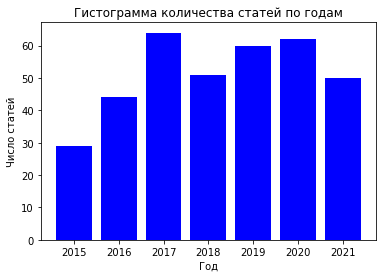

In [10]:
graph_df = df['year'].value_counts(dropna = False).sort_index(ascending=True)
print('Общее число статей за 2015-2021:', df.shape[0])
print(graph_df)
plt.bar(graph_df.index.tolist(), graph_df.tolist(), color='b')
plt.title('Гистограмма количества статей по годам')
plt.xlabel('Год')
plt.ylabel('Число статей');

In [11]:
df.head()

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_5,name_5,id_6,name_6,id_7,name_7,id_8,name_8,id_9,name_9
0,https://doi.org/10.17323/1995-459x.2016.1.31.42,Quadruple Innovation Helix and Smart Specializ...,2016,97,2,Форсайт,https://openalex.org/A4339445160,Elias G. Carayannis,https://openalex.org/A4342657467,Evangelos Grigoroudis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://doi.org/10.17323/2500-2597.2017.4.6.8,Industry 4.0: New Challenges and Opportunities...,2017,75,1,Форсайт,https://openalex.org/A2885210810,Sandrine Kergroach,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://doi.org/10.17323/2500-2597.2017.2.10.26,"The Knowledge Triangle between Research, Educa...",2017,47,2,Форсайт,https://openalex.org/A2408584087,Maximilian Unger,https://openalex.org/A627483062,Wolfgang Polt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://doi.org/10.17323/2500-2597.2019.2.19.41,Generic and Specific Skills as Components of H...,2019,37,3,Форсайт,https://openalex.org/A2259413666,Yaroslav Kuzminov,https://openalex.org/A4357915678,Pavel Sorokin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://doi.org/10.17323/2500-2597.2019.2.84.96,The Risks of Digitalization and the Adaptation...,2019,35,3,Форсайт,https://openalex.org/A4357866443,Stepan Zemtsov,https://openalex.org/A4360074228,Vera Barinova,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df[df['doi'].isnull()].tail()

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_5,name_5,id_6,name_6,id_7,name_7,id_8,name_8,id_9,name_9
615,None,Обучение Форсайт-компетенциям и его интеграция...,2021,0,4,Форсайт,https://openalex.org/A4335059496,А. Ю. Кононюк,https://openalex.org/A3034457639,А. Сачио-Шиманьска,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616,None,Why are Some recommendation systems Preferred,2020,0,1,Форсайт,https://openalex.org/A3211739970,Йи Гаофенг,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,None,Intellectual Capital and Its Impact on the Fin...,2017,0,2,Форсайт,https://openalex.org/A4354878973,Tatiana Andreeva,https://openalex.org/A2189408689,Tatiana Garanina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,None,Is Flexible Labor Good for Innovation? Evidenc...,2016,0,1,Форсайт,https://openalex.org/A4352218561,Larisa Smirnykh,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,None,Patent-Based Technology Life Cycle Analysis: T...,2016,0,7,Форсайт,https://openalex.org/A2556676302,Mohammad Dehghani Madvar,https://openalex.org/A4346329660,Hossein Khosropour,...,https://openalex.org/A2488786316,Adel Azaribeni,https://openalex.org/A1869071835,Morteza Rezapour,https://openalex.org/A2186300045,Behrouz Nouri,NaN,NaN,NaN,NaN


In [13]:
all_names_1 = pd.read_csv('FakeNameGenerator.com_3179ce45.csv')
all_names_2 = pd.read_csv('FakeNameGenerator.com_f15ca33b.csv')
russian_names = pd.read_csv('FakeNameGenerator.com_30079f07.csv')
all_names = pd.concat([all_names_1, all_names_2, russian_names])
all_names

,Gender,NameSet,GivenName,MiddleInitial,Surname
0,female,Australian,Mia,R,Dawson
1,male,Chechen (Latin),Khasan,L,Arsanukayev
2,female,Japanese (Anglicized),Nodoka,T,Morikawa
3,male,Persian,فرشید,ز,خاتمی
4,male,Polish,Gustaw,J,Nowicki
...,...,...,...,...,...
99995,male,NaN,Plato,NaN,Shubin
99996,male,NaN,Афанасий,NaN,Сидоров
99997,female,NaN,Yolanda,NaN,Davydova
99998,female,NaN,Клеопатра,NaN,Лаврентьева


In [14]:
'''
Определим пользовательскую функцию - Author_gender(Author) - для идентификации пола автора.

Сначала определяем списки окончаний мужских и женских славянских фамилий, для женщин - еще и отчеств:
female_end_list и male_end_list. Поскольку для части наблюдений ФИО записаны кириллицей, а для части -
латиницей, то включаем и те, и другие окончания.

Как работает функция?
Функция делит содержимое переменной, подаваемой на вход, на составные части (возможно, фамилию, имя, отчество, 
но не всегда), и в каждой выделенной части проверяет, совпадают ли окончания этих частей хотя бы с одним из 
элементов из списков female_end_list и male_end_list. Если совпадение найдено, то в список gender_list заносится
соответствующий элемент ('f' либо 'm').
Поскольку на выходе нам нужен не список, а строка (string в терминологии Python), то мы определяем переменную
gender как строковую и перезаписываем ее в зависимости от содержимого списка gender_list.
''' 


female_end_list = ['ova', 'ina', 'eva', 'aia', 'aya', 'vna', 'ова', 'ина', 'ева', 'ая', 'вна']
male_end_list = ['ov', 'in', 'ev', 'ky', 'ii', 'yi', 'iy', 'ny', 'oy', 'oi', 'ин', 'ын', 'ов', 'ев', 'ий', 'ый', 'ой']
surnames_f = all_names[all_names['Gender'] == 'female']
lst_surnames_f=surnames_f['Surname'].to_list()
lst_names_f = surnames_f['GivenName'].to_list()
surnames_m = all_names[all_names['Gender'] == 'male']
lst_surnames_m=surnames_m['Surname'].to_list()
lst_names_m = surnames_m['GivenName'].to_list()
def Author_gender(Author):
    gender_list = []
    gender = ''
    auth_list = Author.split(sep = ' ')
    for auth in auth_list:
        for i in female_end_list:
            if auth.endswith(i) == True:
                gender_list.append('f')
                

        for i in male_end_list:
            if auth.endswith(i) == True:
                gender_list.append('m')
                

    if (gender_list == ['m']) | (gender_list == ['m', 'm']) | (gender_list == ['m', 'm', 'm']):
        gender = 'm'
        return gender
    
    if (gender_list == ['f']) | (gender_list == ['f', 'f']) | (gender_list == ['f', 'f', 'f']):
        gender = 'f'
        return gender
    if gender == '':
        for auth in auth_list:
            if auth in lst_surnames_f:
                gender_list.append('f')
                gender = 'f'
                return gender
            if auth in lst_surnames_m:
                gender_list.append('m')
                gender = 'm'
                return gender

            if auth in lst_names_f:
                gender_list.append('f')
                gender = 'f'
                return gender
            if auth in lst_names_m:
                gender_list.append('m')
                gender = 'm'
                return gender


    gender = '???'            
    return gender   

In [16]:
# Ключевой блок кода!
df['N_authors'] = df['N_authors'].astype('int')
max_n_authors = df['N_authors'].max()

for x in range(1, max_n_authors + 1):
    str_x = str(x)
    # чистка данных по id и имени авторов с использованием синтаксиса регулярных выражений
    df[f'name_{str_x}'] = df[f'name_{str_x}'].str.replace('\.', '', regex=True)
    df[f'name_{str_x}'] = df[f'name_{str_x}'].str.replace('  ', ' ', regex=True)    
    df[f'name_{str_x}'] = df[f'name_{str_x}'].str.replace('^\s+', '', regex=True)
    df[f'name_{str_x}'] = df[f'name_{str_x}'].str.replace('\s+$', '', regex=True)
    df[f'id_{str_x}'] = df[f'id_{str_x}'].replace('https://openalex.org/', '', regex=True)
    # Создание переменных пола авторов
    df[f'gender_{str_x}'] = df[f'name_{str_x}'].apply(lambda x: Author_gender(x) if isinstance(x, str) else x)
    
df.tail()
# df[f'name_{3}'].values[4].split(sep = ' ')


,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,name_9,gender_1,gender_2,gender_3,gender_4,gender_5,gender_6,gender_7,gender_8,gender_9
639,https://doi.org/10.17323/1995-459x.2016.4.46.58.,Knowledge-Intensive Business Services in Russi...,2016,0,2,Форсайт,A2024676981,Veronika Belousova,A1867120861,Nikolay Chichkanov,...,NaN,f,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,None,Is Flexible Labor Good for Innovation? Evidenc...,2016,0,1,Форсайт,A4352218561,Larisa Smirnykh,NaN,NaN,...,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,None,Patent-Based Technology Life Cycle Analysis: T...,2016,0,7,Форсайт,A2556676302,Mohammad Dehghani Madvar,A4346329660,Hossein Khosropour,...,NaN,m,m,???,???,m,???,m,NaN,NaN
693,https://doi.org/10.17323/2500-2597.2019.1.6.18.,Middle Innovation Trap,2019,0,4,Форсайт,A4300626816,Jeong-Dong Lee,A4300626817,Chulwoo Baek,...,NaN,f,???,f,???,NaN,NaN,NaN,NaN,NaN
698,https://doi.org/10.17323/2500-2597.2017.1.42.53.,Scientific Cooperation in a German-Polish Bord...,2017,0,4,Форсайт,A4306079311,Jutta Gunther,A2948548721,Gresa Latifi,...,NaN,f,???,f,f,NaN,NaN,NaN,NaN,NaN


In [20]:
# Сохраняем таблицу в виде файла в формате Excel

df.to_excel(r'C:\Users\Natil\OneDrive\Desktop\Foresight.xlsx') 

In [17]:
df_non_repeated = df[~df.duplicated(subset=['name_1','name_2', 'name_3', 'name_4', 'name_5', 'name_6', 'name_7', 'name_8', 'name_9'])]

In [18]:
df['gender_1'].value_counts ()['???']

124

In [19]:
print("Общее количество авторов:", df_non_repeated['N_authors'].sum())
print('Среднее количество авторов за период', df_non_repeated['N_authors'].mean())

Общее количество авторов: 885
Среднее количество авторов за период 2.6339285714285716


In [20]:
# Общее и среднее число авторов по годам
df_non_repeated.groupby(['year']).agg({'N_authors': (['sum', 'mean'])})

N_authors          
           sum      mean
year                    
2015        67  2.392857
2016       115  2.875000
2017       141  2.389831
2018       113  2.215686
2019       143  2.698113
2020       128  2.285714
2021       178  3.632653

In [21]:
print("Общее число цитирований на статью:", df['cited_by'].sum())
print('Среднее число цитирований на статью за период', df['cited_by'].mean())

Общее число цитирований на статью: 1312
Среднее число цитирований на статью за период 3.6444444444444444


In [22]:
# Общее и среднее число цитирований на статью по годам
df.groupby(['year']).agg({'cited_by': (['sum', 'mean'])})

cited_by          
          sum      mean
year                   
2015       98  3.379310
2016      302  6.863636
2017      322  5.031250
2018      152  2.980392
2019      247  4.116667
2020      125  2.016129
2021       66  1.320000

In [23]:
a = ['gender_1','gender_2', 'gender_3', 'gender_4', 'gender_5', 'gender_6', 'gender_7', 'gender_8', 'gender_9']
df_non_repeated[a].apply(pd.Series.value_counts).loc['f'].sum()


288.0

In [24]:
df_non_repeated[a].apply(pd.Series.value_counts).loc['m'].sum()

256.0

In [25]:
(df_non_repeated[a].apply(pd.Series.value_counts).loc[['f', 'm']].sum().sum())/(df[a].apply(pd.Series.value_counts).loc['f'].sum())

1.7548387096774194

In [26]:
(df_non_repeated[a].apply(pd.Series.value_counts).loc[['f', 'm']].sum().sum())/(df[a].apply(pd.Series.value_counts).loc['m'].sum())

1.9854014598540146

In [27]:
df_non_repeated.groupby(['year'])[a].count()

,gender_1,gender_2,gender_3,gender_4,gender_5,gender_6,gender_7,gender_8,gender_9
year,,,,,,,,,
2015,28,23,12,4,0,0,0,0,0
2016,40,33,21,13,4,2,2,0,0
2017,59,42,28,8,4,0,0,0,0
2018,51,31,17,9,3,2,0,0,0
2019,53,46,24,6,4,4,2,2,2
2020,56,31,21,11,3,3,3,0,0
2021,49,39,34,24,7,4,2,2,2


In [28]:
df_non_repeated.groupby(['year'])[a].count().sum(axis=1)

year
2015     67
2016    115
2017    141
2018    113
2019    143
2020    128
2021    163
dtype: int64

In [29]:
df_non_repeated.groupby(['year'])[a].count()

,gender_1,gender_2,gender_3,gender_4,gender_5,gender_6,gender_7,gender_8,gender_9
year,,,,,,,,,
2015,28,23,12,4,0,0,0,0,0
2016,40,33,21,13,4,2,2,0,0
2017,59,42,28,8,4,0,0,0,0
2018,51,31,17,9,3,2,0,0,0
2019,53,46,24,6,4,4,2,2,2
2020,56,31,21,11,3,3,3,0,0
2021,49,39,34,24,7,4,2,2,2


In [31]:
# доля авторов ж
((df[a].apply(pd.Series.value_counts).loc['f'].sum())/(df_non_repeated[a].apply(pd.Series.value_counts).loc[['f', 'm']].sum().sum())).round(2)

0.57

In [32]:
# доля авторов м
((df[a].apply(pd.Series.value_counts).loc['m'].sum())/(df_non_repeated[a].apply(pd.Series.value_counts).loc[['f', 'm']].sum().sum())).round(2)

0.5

In [34]:
df[['cited_by']] = df[['cited_by']].apply(pd.to_numeric) 

In [46]:
df.nlargest(n=10, columns=['cited_by'], keep='all')[["title", "cited_by", "N_authors", 'gender_1', 'gender_2', 'gender_3']]


,title,cited_by,N_authors,gender_1,gender_2,gender_3
0,Quadruple Innovation Helix and Smart Specializ...,97,2,f,???,NaN
1,Industry 4.0: New Challenges and Opportunities...,75,1,???,NaN,NaN
2,"The Knowledge Triangle between Research, Educa...",47,2,m,m,NaN
4,Generic and Specific Skills as Components of H...,37,3,m,m,m
5,The Risks of Digitalization and the Adaptation...,35,3,m,f,f
6,"Robotics: Breakthrough Technologies, Innovatio...",33,3,m,m,m
7,Pilot Innovative Territorial Clusters in Russi...,28,1,m,NaN,NaN
8,"Foresight, Competitive Intelligence and Busine...",26,3,m,f,f
9,The Automation of Jobs: A Threat for Employmen...,26,1,f,NaN,NaN
10,Beyond Education: The Role of Research Univers...,26,3,f,f,m
